In [220]:
# sklearn models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model

#sklearn metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve 
from sklearn.metrics import auc
from sklearn.metrics import classification_report
from sklearn.learning_curve import learning_curve
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split

#graphs
import matplotlib.pyplot as plt
import seaborn as sns

#basics
import pandas as pd
import numpy as np
from pprint import pprint

#Challenge 1

For the house representatives data set, calculate the accuracy, precision, recall and f1 scores of each classifier you built (on the test set).

To save myself some pain, I'm just going to put all of my models in an array so I can iterate through them and generate the scores I want:

In [172]:
models = {'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5), 
          'Logistic Regression': linear_model.LogisticRegression(), 
          'Gaussian Naive Bayes': GaussianNB(),
          'Support Vector Classifier': SVC(probability=True),
          'Decision Tree Classifier': DecisionTreeClassifier(),
          'Random Forest Classifier': RandomForestClassifier()}

In [173]:
headers = [
    'class'
    ,'handicapped-infants'
    ,'water-project-cost-sharing'
    ,'adoption-of-the-budget-resolution'
    ,'physician-fee-freeze'
    ,'el-salvador-aid'
    ,'religious-groups-in-schools'
    ,'anti-satellite-test-ban'
    ,'aid-to-nicaraguan-contras'
    ,'mx-missile'
    ,'immigration'
    ,'synfuels-corporation-cutback'
    ,'education-spending'
    ,'superfund-right-to-sue'
    ,'crime'
    ,'duty-free-exports'
    ,'export-administration-act-south-africa'
]

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data"
df = pd.read_csv(url, header=None, names=headers)

# replace nulls with mean
df = df.replace(['y', 'n', '?'], [1, 0, np.NaN])
df = df.replace(['democrat', 'republican'], [1, 0])
df = df.fillna(df.mean())

In [174]:
# test-train split
train, test = train_test_split(df, test_size=0.33, random_state=42)
X_train, X_test = train.drop(['class'], axis=1), test.drop(['class'], axis=1)
Y_train, Y_test = train['class'], test['class']

To make life a little bit easier, I'm just going to use `X_train`, `Y_train` and the test data so i don't have to pass this data around to functions. In the code below, if you see these labels floating around, refer to the above to see what they represent (recall that we're regressing "class" to a representatives voting history).

Now, to calcualte the scores for each:



In [175]:
def get_scores(model):
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    return (
    {'Accuracy Score': round(accuracy_score(Y_test, Y_pred), 3),
     'F1 Score': round(f1_score(Y_test, Y_pred, average='binary'), 3),
     'Precision Score': round(precision_score(Y_test, Y_pred, average='binary'), 3), 
     'Recall Score': round(recall_score(Y_test, Y_pred, average='binary'), 3),
    })

for i in models:
    print(i + '\n' +  str(get_scores(models[i])).strip('{}'))
    
    

Decision Tree Classifier
'Recall Score': 0.979, 'Precision Score': 0.969, 'F1 Score': 0.974, 'Accuracy Score': 0.965
Support Vector Classifier
'Recall Score': 0.969, 'Precision Score': 0.979, 'F1 Score': 0.974, 'Accuracy Score': 0.965
Gaussian Naive Bayes
'Recall Score': 0.969, 'Precision Score': 0.931, 'F1 Score': 0.949, 'Accuracy Score': 0.931
K-Nearest Neighbors
'Recall Score': 0.959, 'Precision Score': 0.969, 'F1 Score': 0.964, 'Accuracy Score': 0.951
Logistic Regression
'Recall Score': 0.979, 'Precision Score': 0.979, 'F1 Score': 0.979, 'Accuracy Score': 0.972
Random Forest Classifier
'Recall Score': 0.979, 'Precision Score': 0.95, 'F1 Score': 0.964, 'Accuracy Score': 0.951


#Challenge 2

For each, draw the ROC curve and calculate the AUC. 

Decision Tree Classifier
Support Vector Classifier
Gaussian Naive Bayes
K-Nearest Neighbors
Logistic Regression
Random Forest Classifier


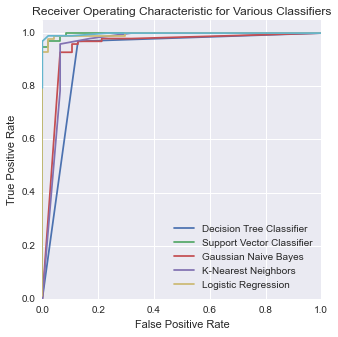

In [183]:
%matplotlib inline
def get_ROC(model):
    model.fit(X_train, Y_train)
    probs = model.fit(X_train, Y_train).predict_proba(X_test)
    fpr, tpr, thresh = roc_curve(Y_test, probs[:,1])
    return (fpr, tpr)

def plot_ROC(name, fpr, tpr):
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic for Various Classifiers')
    plt.legend(loc="lower right")
    plt.plot(tpr, fpr, label=name)

plt.figure(figsize=(5,5))
for i in models:
    print i
    plot_ROC(i, get_ROC(models[i])[1], get_ROC(models[i])[0])
    

In [199]:
def get_AUC(model):
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    probs = model.fit(X_train, Y_train).predict_proba(X_test)
    fpr, tpr, thresh = roc_curve(Y_test, probs[:,1])
    return auc(tpr, fpr) 

for i in models:
    print(i + ': ' +  str(get_AUC(models[i])).strip('{}'))

Decision Tree Classifier: 0.481981981982
Support Vector Classifier: 0.386636636637
Gaussian Naive Bayes: 0.380880880881
K-Nearest Neighbors: 0.353353353353
Logistic Regression: 0.378878878879
Random Forest Classifier: 0.331581581582


#Challenge 3

Calculate the same metrics you did in challenge 1, but this time in a cross validation scheme with the cross_val_score function (like in Challenge 9).

 

In [184]:
def get_scores_cv(model):
    model.fit(X_train, Y_train)    
    return (
    {'Accuracy Score': round(cross_val_score(model, X_train, Y_train, cv=5, scoring='accuracy').mean(), 3),
     'F1 Score': round(cross_val_score(model, X_train, Y_train, cv=5, scoring='f1_weighted').mean(), 3),
     'Precision Score': round(cross_val_score(model, X_train, Y_train, cv=5).mean(), 3), 
     'Recall Score': round(cross_val_score(model, X_train, Y_train, cv=5, scoring='recall').mean(), 3)
    })

for i in models:
    print i + '\n' + str(get_scores_cv(models[i])).strip('{}')


Decision Tree Classifier
'Recall Score': 0.924, 'Precision Score': 0.914, 'F1 Score': 0.911, 'Accuracy Score': 0.918
Support Vector Classifier
'Recall Score': 0.947, 'Precision Score': 0.952, 'F1 Score': 0.952, 'Accuracy Score': 0.952
Gaussian Naive Bayes
'Recall Score': 0.935, 'Precision Score': 0.928, 'F1 Score': 0.928, 'Accuracy Score': 0.928
K-Nearest Neighbors
'Recall Score': 0.9, 'Precision Score': 0.931, 'F1 Score': 0.932, 'Accuracy Score': 0.931
Logistic Regression
'Recall Score': 0.959, 'Precision Score': 0.959, 'F1 Score': 0.959, 'Accuracy Score': 0.959
Random Forest Classifier
'Recall Score': 0.935, 'Precision Score': 0.952, 'F1 Score': 0.945, 'Accuracy Score': 0.935


#Challenge 4

For your movie classifiers, calculate the precision and recall for each class.

 

In [223]:
# import, praise my ingenuity
df = pd.read_csv("~/ds4/challenges/02-pandas/2013_movies.csv")

# train/test split
train, test = train_test_split(df, test_size=0.33, random_state=42)
X_train, X_test = train['Runtime'], test['Runtime']
Y_train, Y_test = train['Rating'], test['Rating']

# adapt inputs so it works
X_train = [[i] for i in X_train]
X_test = [[i] for i in X_test]

# declare models for explicit-ness
models = {'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5), 
          'Logistic Regression': linear_model.LogisticRegression(), 
          'Gaussian Naive Bayes': GaussianNB(),
          'Support Vector Classifier': SVC(probability=True),
          'Decision Tree Classifier': DecisionTreeClassifier(),
          'Random Forest Classifier': RandomForestClassifier()}

In [224]:
def precision_recall_by_class(model):
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    return classification_report(Y_test, model.predict(X_test))

for i in models:
    print i + ':\n' + str(precision_recall_by_class(models[i]))

Decision Tree Classifier:
             precision    recall  f1-score   support

         PG       0.00      0.00      0.00         2
      PG-13       0.57      0.35      0.43        23
          R       0.23      0.38      0.29         8

avg / total       0.45      0.33      0.37        33

Support Vector Classifier:
             precision    recall  f1-score   support

         PG       0.00      0.00      0.00         2
      PG-13       0.69      0.48      0.56        23
          R       0.27      0.50      0.35         8

avg / total       0.54      0.45      0.48        33

Gaussian Naive Bayes:
             precision    recall  f1-score   support

         PG       0.25      0.50      0.33         2
      PG-13       0.72      0.57      0.63        23
          R       0.27      0.38      0.32         8

avg / total       0.58      0.52      0.54        33

K-Nearest Neighbors:
             precision    recall  f1-score   support

         PG       0.00      0.00      0.00    

#Challenge 5

Draw the ROC curve (and calculate AUC) for the logistic regression classifier from challenge 12.

In [225]:
headers =[
    'Age',
    'YearOP',
    'Nodes',
    'Survived'
    ]
url ="https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data"
df = pd.read_csv(url, header=None, names=headers)
df['Survived'] = df['Survived'].replace([1, 2], [1, 0])



Logistic Regression: 0.428099173554
Such bad.


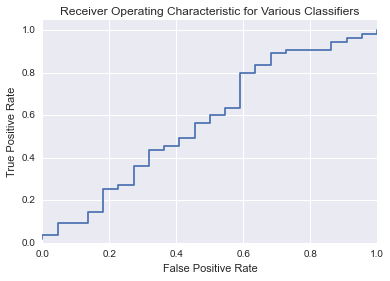

In [227]:
train, test = train_test_split(df, test_size=0.25, random_state=42)
X_train, X_test = train.drop('Survived', axis=1), test.drop('Survived', axis=1)
Y_train, Y_test = train['Survived'], test['Survived']

logit = linear_model.LogisticRegression()
logit.fit(X_train, Y_train)
plot_ROC('Logistic Regression', get_ROC(models['Logistic Regression'])[1], get_ROC(models['Logistic Regression'])[0])
print('Logistic Regression: ' +  str(get_AUC(linear_model.LogisticRegression())).strip('{}'))
print('Such bad.')